In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings("ignore")
 
%matplotlib inline

In [2]:
FullDaily=pd.read_excel("D:\Data\P2P\FullDailyShutDownInf0630.xlsx")
p2p_shutDown=pd.read_excel("D:\Data\P2P\P2P_ShutDownPlatform.xlsx")
p2p_basic=pd.read_excel("D:\Data\P2P\P2P平台基本信息表_Raw.xlsx")
p2p_detail=pd.read_excel("D:\Data\P2P\P2P平台日成交详情数据_Raw.xlsx")
p2p_detail=p2p_detail[1:]

In [4]:
p2p_shutDown.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5799 entries, 0 to 5798
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5799 non-null   int64  
 1   name                  5799 non-null   object 
 2   ShortName             5793 non-null   object 
 3   operating_state       5799 non-null   int64  
 4   province_id           5799 non-null   int64  
 5   black_time            5799 non-null   object 
 6   is_black              5799 non-null   int64  
 7   city_name             5799 non-null   object 
 8   black_involve_money   0 non-null      float64
 9   black_involve_people  0 non-null      float64
 10  black_type            5799 non-null   int64  
 11  black_url             5564 non-null   object 
 12  online_time           5020 non-null   object 
 13  black_type_name       5767 non-null   object 
 14  AdBlackType           5799 non-null   object 
 15  is_click             

In [65]:
p2p_detail

,FullName,TradingDate,PlatformID,TradingVolume,AveReturn,InvestorNum,AveLimTime,LoanNum,CumulateRepay,F30Repay,F60Repay
1,神州通宝,2015-09-27,217000001577,50,9.8,33,3,1,7923.72,4.91,5217.78
2,宁创贷,2015-09-27,217000000160,0,0,0,0,0,5967.61,-81.49,2382.11
3,汇理财,2015-09-27,217000000091,195,12.35,63,4.89,2,33192.41,2172.53,10117.57
4,乐贷网,2015-09-27,217000000118,0,0,0,0,0,12551.19,424.87,5108.71
5,小鹅网,2015-09-27,217000001575,0,0,0,0,0,2089.4,76.96,819.29
...,...,...,...,...,...,...,...,...,...,...,...
573879,e路同心,2020-06-24,217000000259,0,0,0,0,0,1991.87,-23.94,924.01
573880,新富创投,2020-06-24,217000004457,0,0,0,0,0,1801.41,-17.6,737.63
573881,首E家,2020-06-24,217000001767,0,0,0,0,0,10616.66,-100.69,1492.36
573882,互融宝,2020-06-24,217000000132,0,0,0,0,0,17269.22,-199.63,7341.53


In [ ]:
FullDaily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   black_time         2461 non-null   datetime64[ns]
 1   平台失联               2461 non-null   int64         
 2   涉及司法或者介入           2461 non-null   int64         
 3   未知                 2461 non-null   int64         
 4   运营暂停或清理            2461 non-null   int64         
 5   TotalShutDown      2461 non-null   int64         
 6   Cum_平台失联           2461 non-null   int64         
 7   Cum_涉及司法或者介入       2461 non-null   int64         
 8   Cum_未知             2461 non-null   int64         
 9   Cum_运营暂停或清理        2461 non-null   int64         
 10  Cum_TotalShutDown  2461 non-null   int64         
dtypes: datetime64[ns](1), int64(10)
memory usage: 211.6 KB


In [5]:
p2p_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25294 entries, 0 to 25293
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   平台ID     25294 non-null  int64  
 1   平台       25294 non-null  object 
 2   上线时间     25294 non-null  object 
 3   更新日期     25294 non-null  object 
 4   网址       18556 non-null  object 
 5   注册资本_万元  24570 non-null  float64
 6   平台背景     17340 non-null  object 
 7   投资门槛     6133 non-null   object 
 8   资金托管     7850 non-null   object 
 9   风险准备金    2777 non-null   object 
 10  保障方式     12727 non-null  object 
 11  担保机构     1844 non-null   object 
 12  承保金额_万元  1843 non-null   object 
 13  自动投标     17649 non-null  object 
 14  债券转让     17714 non-null  object 
 15  业务类型     12172 non-null  object 
 16  所在城市_省市  25294 non-null  object 
 17  所在城市_辖区  25283 non-null  object 
dtypes: float64(1), int64(1), object(16)
memory usage: 3.5+ MB


In [6]:
p2p_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573883 entries, 1 to 573883
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   FullName       573883 non-null  object
 1   TradingDate    573883 non-null  object
 2   PlatformID     573883 non-null  object
 3   TradingVolume  573883 non-null  object
 4   AveReturn      573883 non-null  object
 5   InvestorNum    573876 non-null  object
 6   AveLimTime     573883 non-null  object
 7   LoanNum        573876 non-null  object
 8   CumulateRepay  573866 non-null  object
 9   F30Repay       573853 non-null  object
 10  F60Repay       567416 non-null  object
dtypes: object(11)
memory usage: 48.2+ MB


In [7]:
p2p_detail.head()

,FullName,TradingDate,PlatformID,TradingVolume,AveReturn,InvestorNum,AveLimTime,LoanNum,CumulateRepay,F30Repay,F60Repay
1,神州通宝,2015-09-27,217000001577,50,9.8,33,3,1,7923.72,4.91,5217.78
2,宁创贷,2015-09-27,217000000160,0,0,0,0,0,5967.61,-81.49,2382.11
3,汇理财,2015-09-27,217000000091,195,12.35,63,4.89,2,33192.41,2172.53,10117.57
4,乐贷网,2015-09-27,217000000118,0,0,0,0,0,12551.19,424.87,5108.71
5,小鹅网,2015-09-27,217000001575,0,0,0,0,0,2089.4,76.96,819.29


## data minning on FullDaily

In [8]:
FullDaily.head()

,black_time,平台失联,涉及司法或者介入,未知,运营暂停或清理,TotalShutDown,Cum_平台失联,Cum_涉及司法或者介入,Cum_未知,Cum_运营暂停或清理,Cum_TotalShutDown
0,2013-04-02,0,0,0,1,1,0,0,0,1,1
1,2013-04-03,0,0,0,0,0,0,0,0,1,1
2,2013-04-04,0,0,0,0,0,0,0,0,1,1
3,2013-04-05,0,0,0,0,0,0,0,0,1,1
4,2013-04-06,0,0,0,0,0,0,0,0,1,1


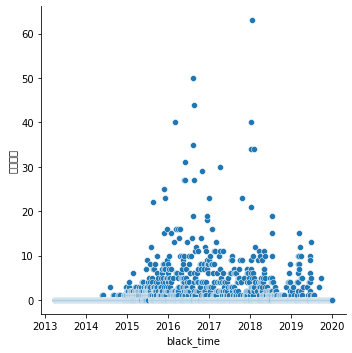

In [9]:
#fig = plt.figure(figsize=(4, 6))  # 指定绘图对象宽度和高度
sns.relplot(FullDaily["black_time"],FullDaily['平台失联'])

<AxesSubplot:xlabel='平台失联', ylabel='Density'>

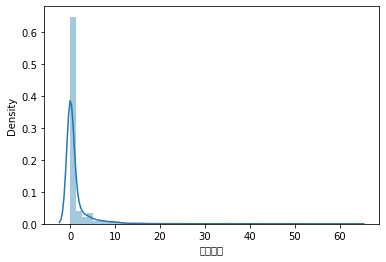

In [10]:
sns.distplot(FullDaily['平台失联'])

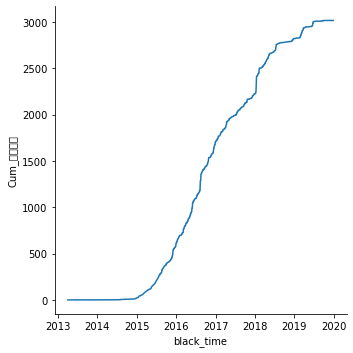

In [11]:
sns.relplot(FullDaily["black_time"],FullDaily['Cum_平台失联'],kind="line")

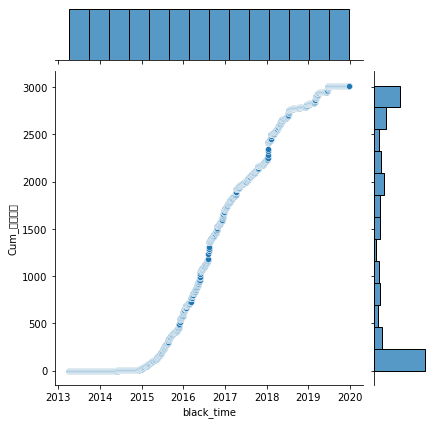

In [12]:
sns.jointplot(x="black_time", y="Cum_平台失联", data=FullDaily)

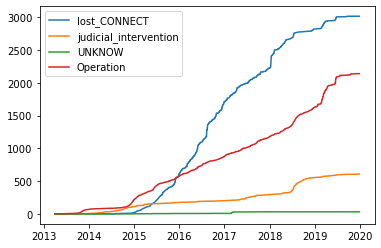

In [24]:
fig, ax = plt.subplots()
ax.plot(FullDaily["black_time"], FullDaily["Cum_平台失联"], label='lost_CONNECT')
ax.plot(FullDaily["black_time"], FullDaily["Cum_涉及司法或者介入"], label='judicial_intervention')
ax.plot(FullDaily["black_time"], FullDaily["Cum_未知"], label='UNKNOW')
ax.plot(FullDaily["black_time"], FullDaily["Cum_运营暂停或清理"], label='Operation')
#ax.plot(FullDaily["black_time"], FullDaily["Cum_TotalShutDown"], label='TotalShutDown')
#x.set(ylabel='Temperature (deg C)', xlabel='Time', title='A tale of two cities')
ax.legend()
plt.show()


In [25]:
FullDaily.describe()

,平台失联,涉及司法或者介入,未知,运营暂停或清理,TotalShutDown,Cum_平台失联,Cum_涉及司法或者介入,Cum_未知,Cum_运营暂停或清理,Cum_TotalShutDown
count,2461.000000,2461.000000,2461.000000,2461.000000,2461.000000,2461.000000,2461.000000,2461.000000,2461.000000,2461.000000
mean,1.225924,0.247054,0.013003,0.869972,2.355953,1329.099147,241.003251,15.369768,835.809427,2421.281593
std,3.812815,0.791158,0.190830,2.003086,5.023044,1176.956391,193.425961,14.079413,664.061101,2024.348057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,103.000000,1.000000,153.000000,268.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1286.000000,194.000000,7.000000,786.000000,2273.000000
75%,1.000000,0.000000,0.000000,1.000000,3.000000,2596.000000,319.000000,32.000000,1275.000000,4222.000000
max,63.000000,10.000000,5.000000,29.000000,63.000000,3017.000000,608.000000,32.000000,2141.000000,5798.000000


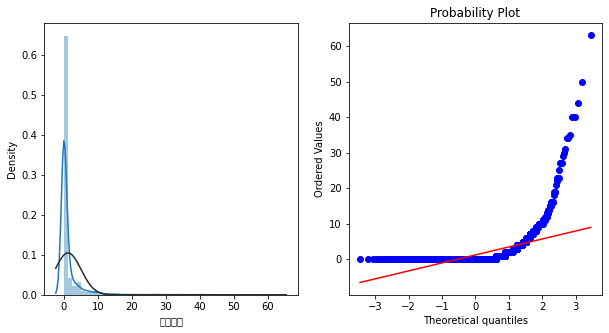

In [26]:
plt.figure(figsize=(10,5))

ax=plt.subplot(1,2,1)
sns.distplot(FullDaily['平台失联'],fit=stats.norm)
ax=plt.subplot(1,2,2)
res = stats.probplot(FullDaily['平台失联'], plot=plt)

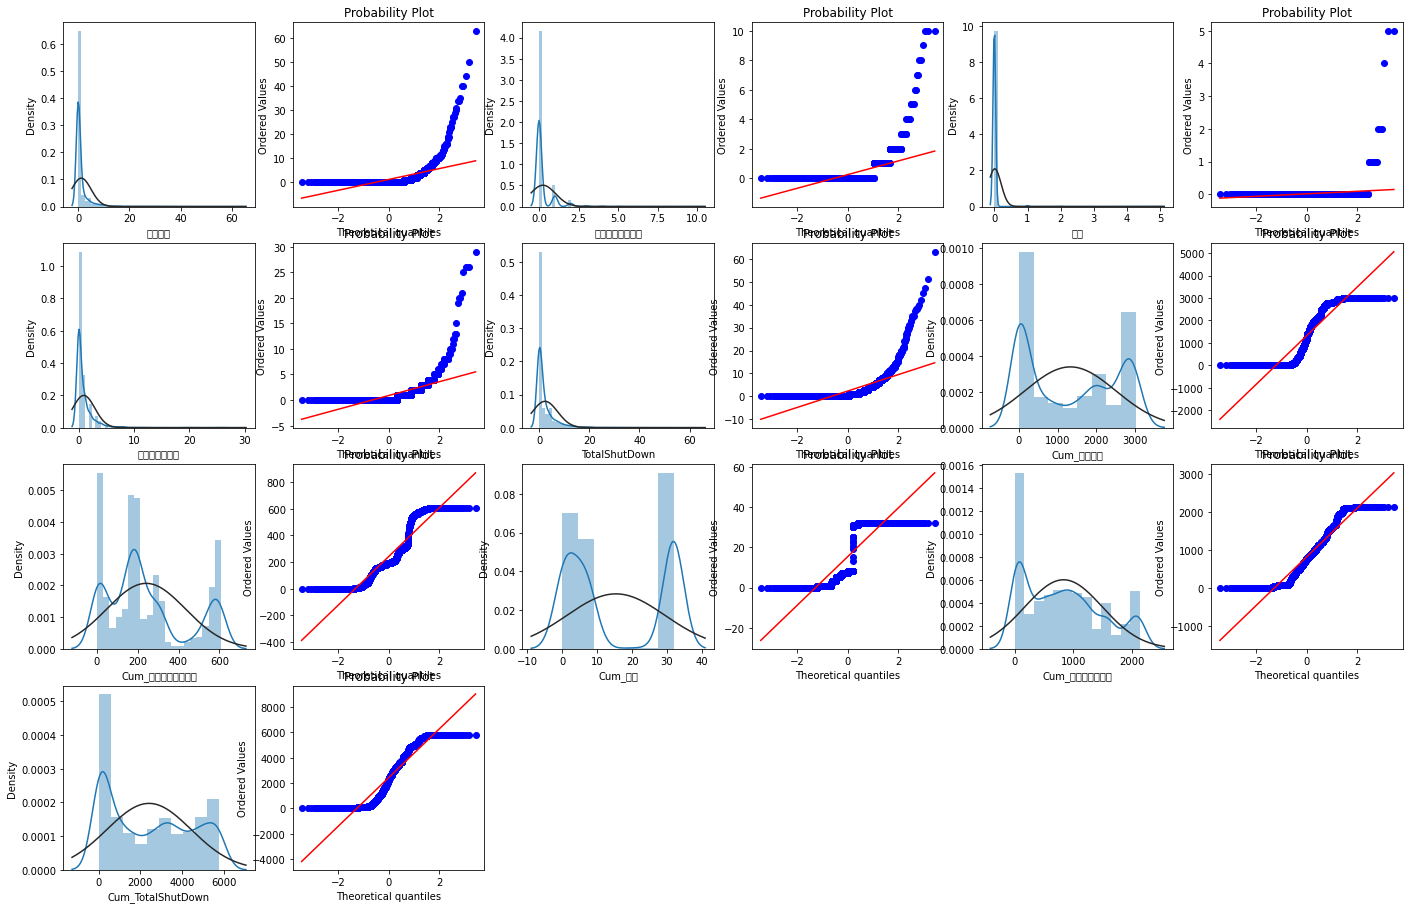

In [30]:
train_cols = 6
train_rows = len(FullDaily.columns)-1
plt.figure(figsize=(4*train_cols,4*train_rows))

i=0
for col in FullDaily.columns:
    if col !="black_time":
        i+=1
        ax=plt.subplot(train_rows,train_cols,i)
        sns.distplot(FullDaily[col],fit=stats.norm)
        
        i+=1
        ax=plt.subplot(train_rows,train_cols,i)
        res = stats.probplot(FullDaily[col], plot=plt)
plt.show()

In [32]:
train_corr = FullDaily.corr()
train_corr

,平台失联,涉及司法或者介入,未知,运营暂停或清理,TotalShutDown,Cum_平台失联,Cum_涉及司法或者介入,Cum_未知,Cum_运营暂停或清理,Cum_TotalShutDown
平台失联,1.000000,0.069082,0.029482,0.321764,0.899378,0.050817,0.009072,0.025643,0.035972,0.042390
涉及司法或者介入,0.069082,1.000000,-0.018594,0.199578,0.288825,0.123955,0.103989,0.145069,0.088243,0.111959
未知,0.029482,-0.018594,1.000000,0.022504,0.066415,0.007869,-0.017347,0.009860,-0.003641,0.001792
运营暂停或清理,0.321764,0.199578,0.022504,1.000000,0.675308,0.151179,0.172933,0.144763,0.155350,0.156387
TotalShutDown,0.899378,0.288825,0.066415,0.675308,1.000000,0.118683,0.091568,0.100417,0.103016,0.112243
Cum_平台失联,0.050817,0.123955,0.007869,0.151179,0.118683,1.000000,0.921114,0.949865,0.966325,0.993009
Cum_涉及司法或者介入,0.009072,0.103989,-0.017347,0.172933,0.091568,0.921114,1.000000,0.855579,0.978356,0.957973
Cum_未知,0.025643,0.145069,0.009860,0.144763,0.100417,0.949865,0.855579,1.000000,0.898606,0.935733
Cum_运营暂停或清理,0.035972,0.088243,-0.003641,0.155350,0.103016,0.966325,0.978356,0.898606,1.000000,0.989590
Cum_TotalShutDown,0.042390,0.111959,0.001792,0.156387,0.112243,0.993009,0.957973,0.935733,0.989590,1.000000


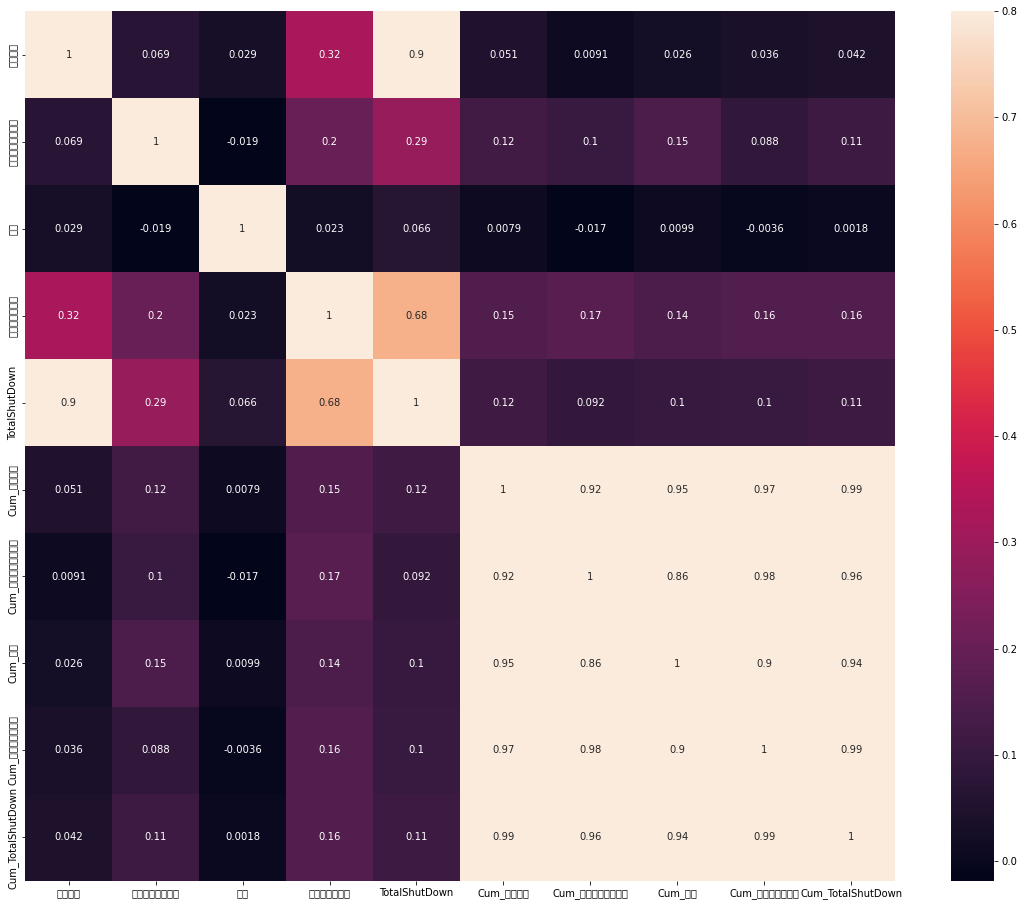

In [33]:
ax = plt.subplots(figsize=(20, 16))#调整画布大小

ax = sns.heatmap(train_corr, vmax=.8, square=True, annot=True)#画热力图   annot=True 显示系数

In [37]:
label_gp = FullDaily.groupby('平台失联')['black_time'].count()[:5]
label_gp

平台失联
0    1806
1     200
2     128
3      67
4      65
Name: black_time, dtype: int64

Text(0, 0.5, 'TotalShutDown')

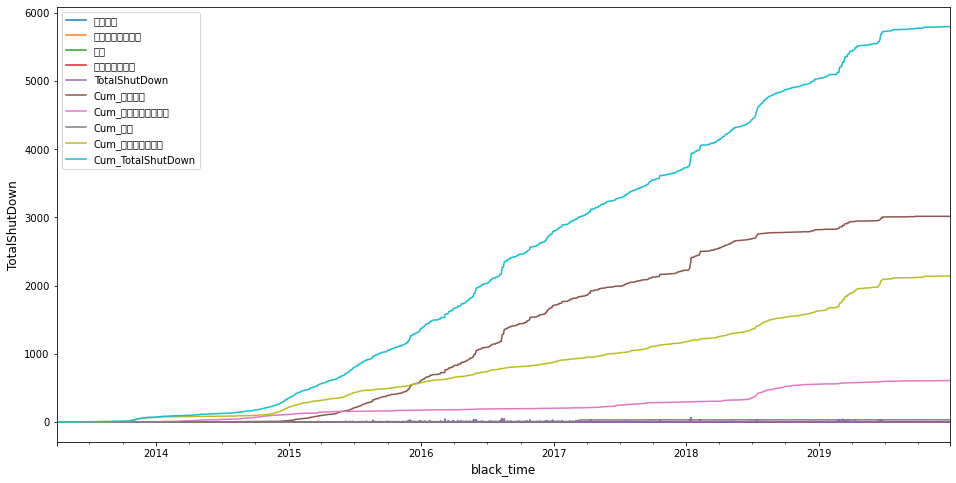

In [38]:
ax = FullDaily.set_index('black_time').plot(figsize = (16, 8))
ax.set_xlabel('black_time', fontsize = 'large')
ax.set_ylabel("TotalShutDown", fontsize = 'large')

In [47]:
FullDaily['Time'] = np.arange(len(FullDaily.index))

In [49]:
FullDaily


,black_time,平台失联,涉及司法或者介入,未知,运营暂停或清理,TotalShutDown,Cum_平台失联,Cum_涉及司法或者介入,Cum_未知,Cum_运营暂停或清理,Cum_TotalShutDown,Time
0,2013-04-02,0,0,0,1,1,0,0,0,1,1,0
1,2013-04-03,0,0,0,0,0,0,0,0,1,1,1
2,2013-04-04,0,0,0,0,0,0,0,0,1,1,2
3,2013-04-05,0,0,0,0,0,0,0,0,1,1,3
4,2013-04-06,0,0,0,0,0,0,0,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2456,2019-12-23,0,0,0,0,0,3017,608,32,2141,5798,2456
2457,2019-12-24,0,0,0,0,0,3017,608,32,2141,5798,2457
2458,2019-12-25,0,0,0,0,0,3017,608,32,2141,5798,2458
2459,2019-12-26,0,0,0,0,0,3017,608,32,2141,5798,2459


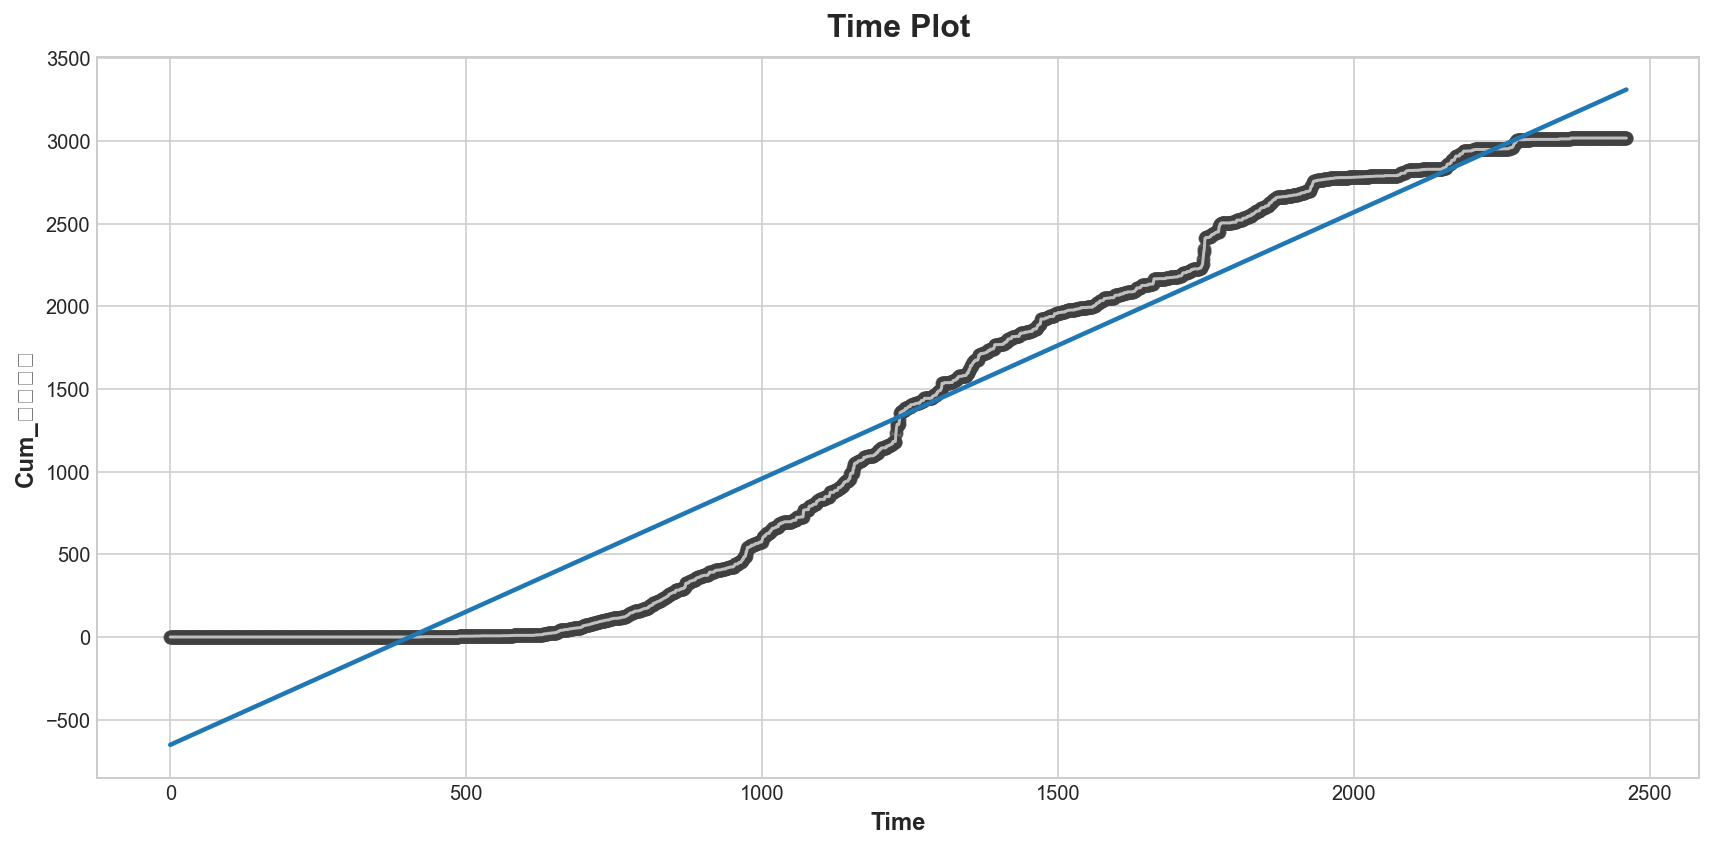

In [56]:
import seaborn as sns

plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(12, 6),
    titlesize=18,
    titleweight='bold',
)

plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)

# Use it for the Lag_1 plot later.
plot_params = dict(
    color = '0.75',
    style = ".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

fig, ax = plt.subplots()
ax.plot("Time","Cum_平台失联", data=FullDaily, color='0.75')
ax = sns.regplot(x='Time', y='Cum_平台失联', data=FullDaily, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot');

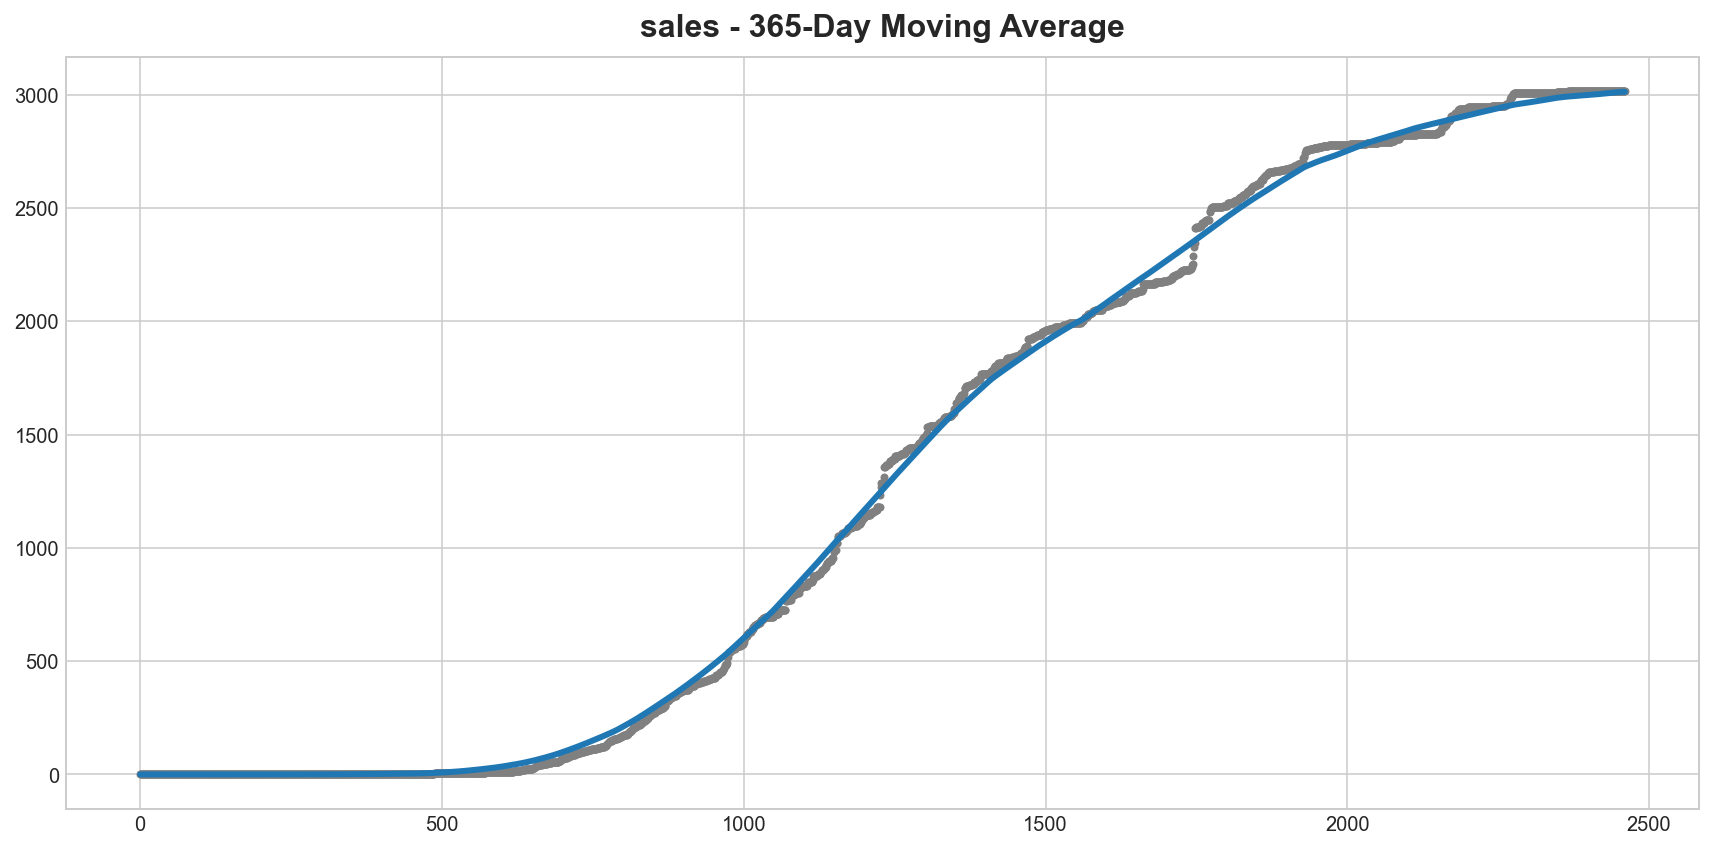

In [60]:
moving_average = FullDaily["Cum_平台失联"].rolling(
    window=365,       # 365-day window
    center=True,      # puts the average at the center of the window
    min_periods=183,  # choose about half the window size
).mean()              # compute the mean (could also do median, std, min, max, ...)

ax = FullDaily["Cum_平台失联"].plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="sales - 365-Day Moving Average", legend=False,
);